# Multi-Variable Linear Regression: From Scratch vs scikit-learn

This notebook demonstrates multivariate linear regression implementation using:
1. **From-scratch implementation** using Normal Equation (OLS analytical solution)
2. **scikit-learn LinearRegression** for comparison
3. **Side-by-side evaluation** on the same train/test split

## Dataset: Advertising Sales
- **Features**: TV, Radio, Newspaper advertising budgets
- **Target**: Sales
- **Goal**: Predict sales based on advertising spend across different media

In [163]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split    
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## 1. Import Libraries

In [164]:
advertisingData = pd.read_csv('data/advertising.csv')
advertisingData.head()
X = advertisingData[['TV', 'Radio', 'Newspaper']]
Y = advertisingData['Sales']

## 2. Load and Explore Data

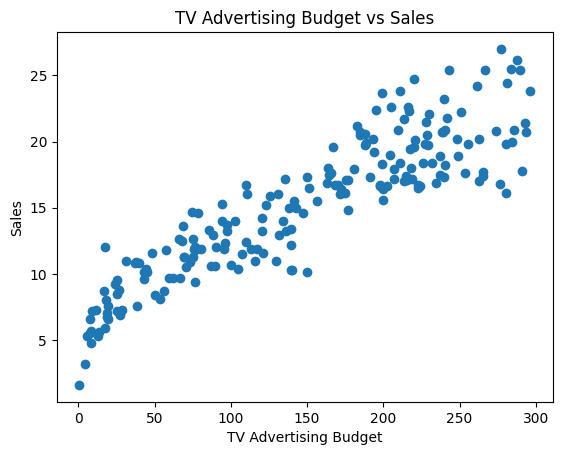

In [165]:
plt.scatter(advertisingData['TV'], advertisingData['Sales'])
plt.xlabel('TV Advertising Budget')
plt.ylabel('Sales')
plt.title('TV Advertising Budget vs Sales')
plt.show()

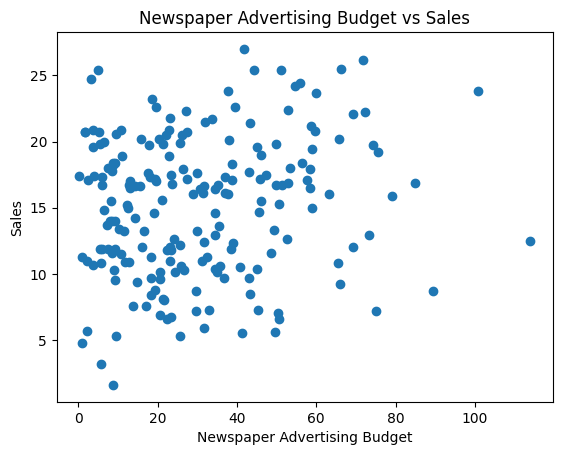

In [166]:
plt.scatter(advertisingData['Newspaper'], advertisingData['Sales'])
plt.xlabel('Newspaper Advertising Budget')
plt.ylabel('Sales')
plt.title('Newspaper Advertising Budget vs Sales')
plt.show()

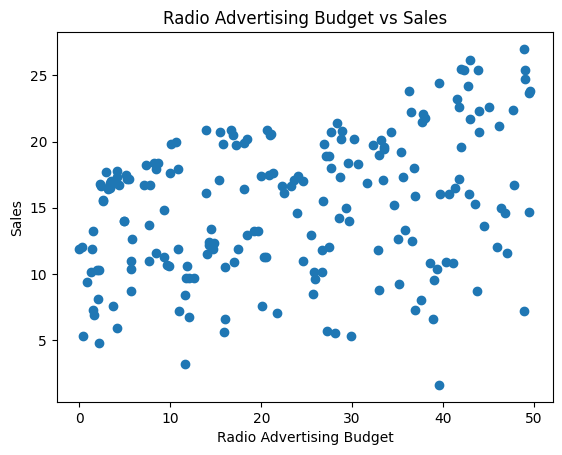

In [167]:
plt.scatter(advertisingData['Radio'], advertisingData['Sales'])
plt.xlabel('Radio Advertising Budget')
plt.ylabel('Sales')
plt.title('Radio Advertising Budget vs Sales')
plt.show()

## 3. Train/Test Split

In [168]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)
X_train = X_train.values
Y_train = Y_train.values.flatten()
Y_test = Y_test.values.flatten()
X_test = X_test.values

## 4. From-Scratch Implementation (Normal Equation)

In [169]:
class MultiLr:
    def __init__(self):
        self.coef_ = None
        self.intercept_ = None

    def fit(self, X_train, Y_train):
        X_train = np.insert(X_train, 0, 1, axis=1)
        betas = np.linalg.inv(np.dot(X_train.T, X_train)).dot(X_train.T).dot(Y_train)
        self.intercept_ = betas[0]
        self.coef_ = betas[1:]

    def predict(self, X_test):
        return np.dot(X_test, self.coef_) + self.intercept_

In [170]:
lr = MultiLr()
lr.fit(X_train, Y_train)

## 5. scikit-learn Implementation

In [171]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

## 6. Model Comparison and Evaluation

In [172]:
y_pred_scratch = lr.predict(X_test)
y_pred_sklearn = model.predict(X_test)

from sklearn.metrics import mean_absolute_error

mse_scratch = mean_squared_error(Y_test, y_pred_scratch)
mae_scratch = mean_absolute_error(Y_test, y_pred_scratch)
r2_scratch = r2_score(Y_test, y_pred_scratch)

mse_sklearn = mean_squared_error(Y_test, y_pred_sklearn)
mae_sklearn = mean_absolute_error(Y_test, y_pred_sklearn)
r2_sklearn = r2_score(Y_test, y_pred_sklearn)

print("="*60)
print("MODEL COMPARISON RESULTS")
print("="*60)
print(f"{'Metric':<20} {'From-Scratch':<15} {'scikit-learn':<15} {'Difference':<15}")
print("-"*60)
print(f"{'MSE':<20} {mse_scratch:<15.6f} {mse_sklearn:<15.6f} {abs(mse_scratch-mse_sklearn):<15.8f}")
print(f"{'MAE':<20} {mae_scratch:<15.6f} {mae_sklearn:<15.6f} {abs(mae_scratch-mae_sklearn):<15.8f}")
print(f"{'R² Score':<20} {r2_scratch:<15.6f} {r2_sklearn:<15.6f} {abs(r2_scratch-r2_sklearn):<15.8f}")

MODEL COMPARISON RESULTS
Metric               From-Scratch    scikit-learn    Difference     
------------------------------------------------------------
MSE                  2.907757        2.907757        0.00000000     
MAE                  1.274826        1.274826        0.00000000     
R² Score             0.905901        0.905901        0.00000000     


In [173]:
print("\n" + "="*60)
print("COEFFICIENTS COMPARISON")
print("="*60)
print(f"{'Feature':<15} {'From-Scratch':<15} {'scikit-learn':<15} {'Difference':<15}")
print("-"*60)

features = ['TV', 'Radio', 'Newspaper']
for i, feature in enumerate(features):
    diff = abs(lr.coef_[i] - model.coef_[i])
    print(f"{feature:<15} {lr.coef_[i]:<15.6f} {model.coef_[i]:<15.6f} {diff:<15.8f}")

print(f"{'Intercept':<15} {lr.intercept_:<15.6f} {model.intercept_:<15.6f} {abs(lr.intercept_-model.intercept_):<15.8f}")


COEFFICIENTS COMPARISON
Feature         From-Scratch    scikit-learn    Difference     
------------------------------------------------------------
TV              0.054509        0.054509        0.00000000     
Radio           0.100945        0.100945        0.00000000     
Newspaper       0.004337        0.004337        0.00000000     
Intercept       4.714126        4.714126        0.00000000     


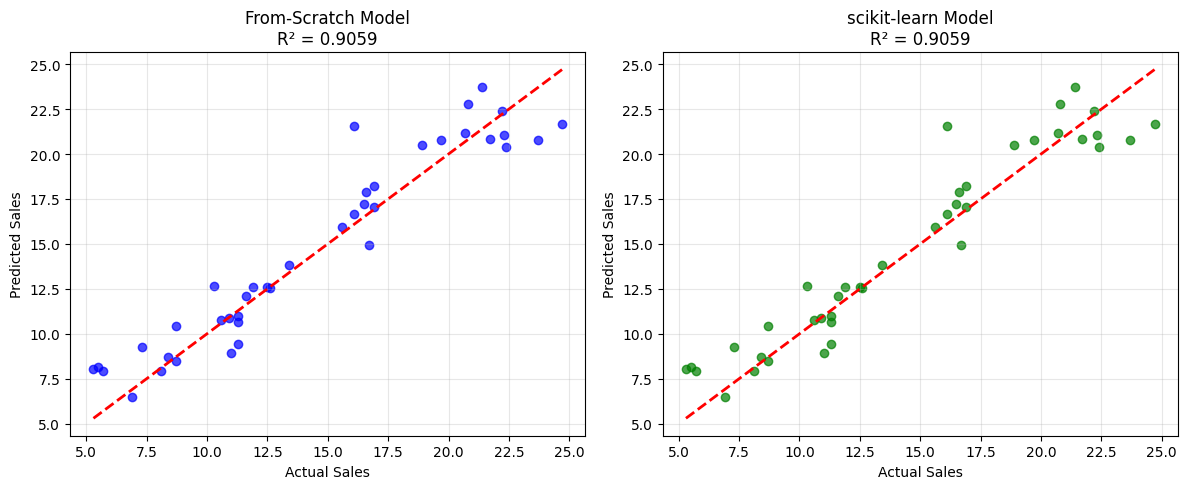

In [174]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(Y_test, y_pred_scratch, alpha=0.7, color='blue')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title(f'From-Scratch Model\nR² = {r2_scratch:.4f}')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.scatter(Y_test, y_pred_sklearn, alpha=0.7, color='green')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title(f'scikit-learn Model\nR² = {r2_sklearn:.4f}')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

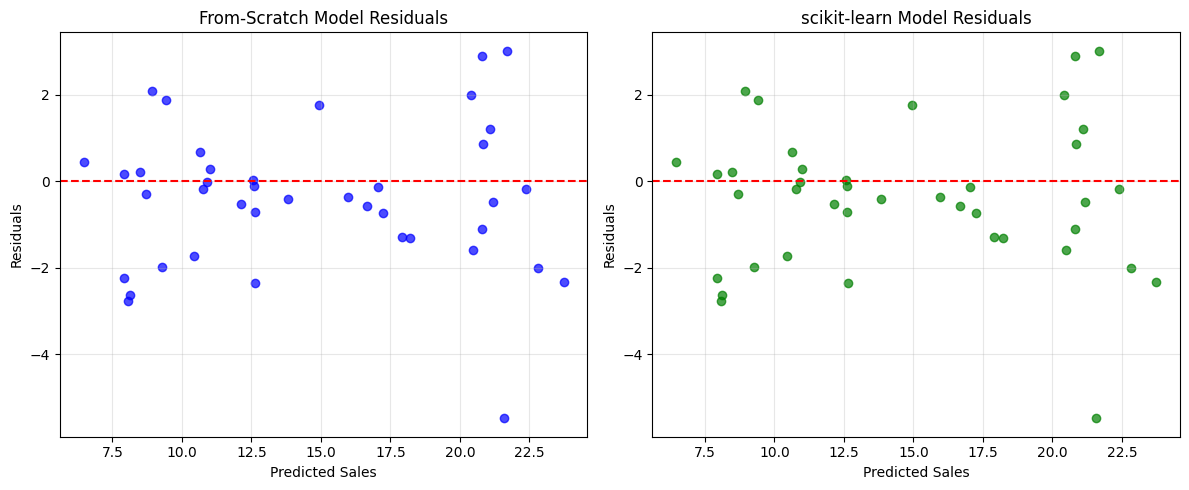

In [175]:
plt.figure(figsize=(12, 5))

residuals_scratch = Y_test - y_pred_scratch
residuals_sklearn = Y_test - y_pred_sklearn

plt.subplot(1, 2, 1)
plt.scatter(y_pred_scratch, residuals_scratch, alpha=0.7, color='blue')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Sales')
plt.ylabel('Residuals')
plt.title('From-Scratch Model Residuals')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.scatter(y_pred_sklearn, residuals_sklearn, alpha=0.7, color='green')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Sales')
plt.ylabel('Residuals')
plt.title('scikit-learn Model Residuals')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 7. Summary

**Key Findings:**
- Both implementations should produce **identical results** since they use the same mathematical approach (Normal Equation/OLS)
- Any differences are due to numerical precision
- The from-scratch implementation demonstrates understanding of the underlying mathematics
- Both models use the optimal analytical solution for linear regression

**Mathematical Approach:**
- **Normal Equation**: β = (X^T X)^(-1) X^T y
- This gives the exact solution without iteration
- Both implementations solve the same optimization problem: minimize sum of squared residuals